# Portfolio Optimization Data Collection

This notebook collects and cleans historical price data for portfolio optimization. The steps include:
1. Importing necessary libraries.
2. Defining tickers and date range.
3. Uploading and loading the raw CSV data.
4. Cleaning and organizing the data.
5. Saving the cleaned data.
6. Visualizing the historical price trends.

In [ ]:
# Importing the required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk", palette="deep")

- **Ticker Symbols (Tickers)**: Short, unique codes used to represent publicly traded companies on a stock exchange. For example, "MSFT" represents Microsoft.
- **Date Range**: The period over which the historical data is collected.

Below, we define a list of tickers and set our start and end dates.

In [ ]:
# Defining tickers and date range
tickers = ["MSFT", "MMM", "HSY", "GE", "GOOGL", "AMZN", "SHY"]
start_date = "2012-01-01"
end_date = "2023-12-31"

In [ ]:

from google.colab import files

# Upload the raw CSV file (e.g., historical_prices.csv)
uploaded = files.upload()

# Get the filename from the uploaded files (assumes only one file is uploaded)
filename = list(uploaded.keys())[0]

# Load the raw data into a DataFrame
raw_prices = pd.read_csv(filename, index_col=0, parse_dates=True)
print("Raw Price Data (first 5 rows):")
print(raw_prices.head())

Saving historical_prices.csv to historical_prices (1).csv
Raw Price Data (first 5 rows):
              AMZN         GE      GOOGL        HSY        MMM       MSFT  \
Date                                                                        
2012-01-01  9.1305  69.240280  16.208012  44.837509  46.040127  22.132902   
2012-01-08  8.9210  69.945709  15.583897  45.421150  46.167137  22.243130   
2012-01-15  9.5465  71.096581  14.611446  45.465488  47.299232  23.392693   
2012-01-22  9.7685  70.651070  14.461590  45.243847  48.298786  23.014755   
2012-01-29  9.3840  70.613945  14.869270  45.184734  48.447895  23.809998   

                  SHY  
Date                   
2012-01-01  71.186943  
2012-01-08  71.245903  
2012-01-15  71.229073  
2012-01-22  71.304886  
2012-01-29  71.237541  


## Data Cleaning and Organization

Clean the data by removing rows with missing values and sorting by date. Display initial rows and a summary of the data.

In [ ]:
if "Date" in raw_prices.columns:
    raw_prices["Date"] = pd.to_datetime(raw_prices["Date"])
    raw_prices = raw_prices.set_index("Date")

# Drop rows with missing values
prices_clean = raw_prices.dropna()

# Sort data by date
prices_clean = prices_clean.sort_index()

print("Cleaned Price Data (first 5 rows):")
print(prices_clean.head())

print("Data Summary:")
print(prices_clean.describe())

Cleaned Price Data (first 5 rows):
              AMZN         GE      GOOGL        HSY        MMM       MSFT  \
Date                                                                        
2012-01-01  9.1305  69.240280  16.208012  44.837509  46.040127  22.132902   
2012-01-08  8.9210  69.945709  15.583897  45.421150  46.167137  22.243130   
2012-01-15  9.5465  71.096581  14.611446  45.465488  47.299232  23.392693   
2012-01-22  9.7685  70.651070  14.461590  45.243847  48.298786  23.014755   
2012-01-29  9.3840  70.613945  14.869270  45.184734  48.447895  23.809998   

                  SHY  
Date                   
2012-01-01  71.186943  
2012-01-08  71.245903  
2012-01-15  71.229073  
2012-01-22  71.304886  
2012-01-29  71.237541  
Data Summary:
             AMZN          GE       GOOGL         HSY         MMM        MSFT  \
count  626.000000  626.000000  626.000000  626.000000  626.000000  626.000000   
mean    72.443852   81.261033   60.640447  112.584280  101.084336  123.903062   


## Save Cleaned Data

Save the cleaned DataFrame to a new CSV file for future use.

In [ ]:
# Save the cleaned data to a new CSV file in a local folder (adjust path as needed)
output_file = "historical_prices_cleaned.csv"
prices_clean.to_csv(output_file)

print(f"Cleaned data saved to '{output_file}'")


Cleaned data saved to 'historical_prices_cleaned.csv'


## Visualize Price Trends

Plot the historical price data to inspect trends over time for each ticker.

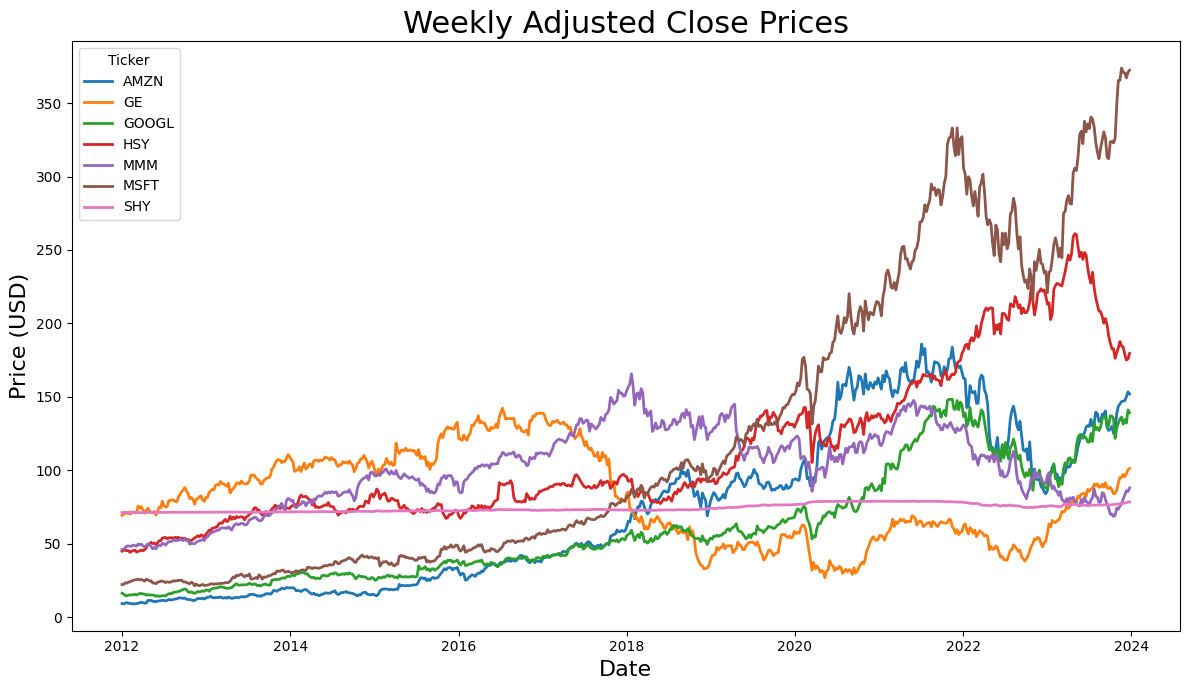

In [ ]:
# Import the matplotlib.pyplot module
import matplotlib.pyplot as plt # Import the necessary library

# Plot the price data for each ticker to get an initial visual understanding.
plt.figure(figsize=(12, 7))
for ticker in prices_clean.columns:
    plt.plot(prices_clean.index, prices_clean[ticker], label=ticker, linewidth=2)
plt.title("Weekly Adjusted Close Prices", fontsize=22)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price (USD)", fontsize=16)
plt.legend(title="Ticker")
plt.tight_layout()
plt.show()